## Flux Scanning based on Objective  Flux

Cameo contains algorithms that can simulate over and downregulation of genes. Here we use it to calculate flux changes for THC production with the main objective being growth, as without growth the organisms wouldn't be able to live for long.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from pytest import approx
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

%run model.ipynb

'' is not a valid SBML 'SId'.


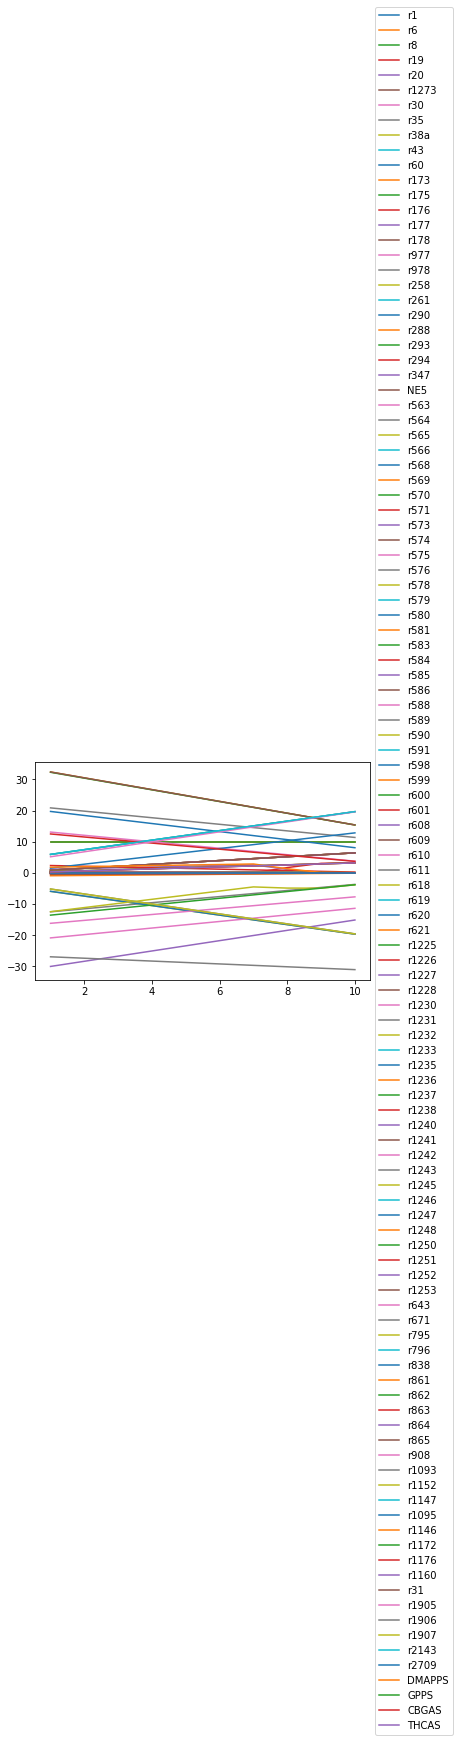

In [22]:
model.objective = {model.reactions.DRAIN_Biomass: 1}
fseof = FSEOF(model)
result= fseof.run(target=model.reactions.THCAS)
df = result.data_frame

result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [23]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
remove = (df != approx(0.0)).all(axis=1)
df = df.loc[remove]

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

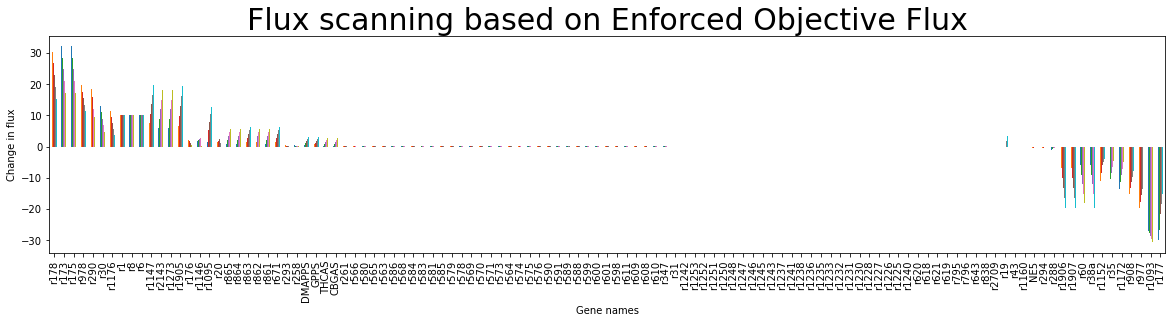

In [24]:
fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [29]:
df['rel_flux_change'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['rel_flux_change'] > 1.7]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,rel_flux_change
r1095,1.536159,2.791534,4.046909,5.302283,6.557658,7.813033,9.068407,10.323782,11.579157,12.834531,1.880310
r865,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r864,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r863,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r862,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r861,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r671,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
DMAPPS,0.395596,0.708297,1.020997,1.333698,1.646399,1.959100,2.271800,2.584501,2.897202,3.209903,1.876758
GPPS,0.395596,0.708297,1.020997,1.333698,1.646399,1.959100,2.271800,2.584501,2.897202,3.209903,1.876758
THCAS,0.320161,0.640323,0.960484,1.280645,1.600807,1.920968,2.241129,2.561291,2.881452,3.201613,1.900000


In [30]:
df = target_reactions_df.drop(labels='rel_flux_change', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 70%')

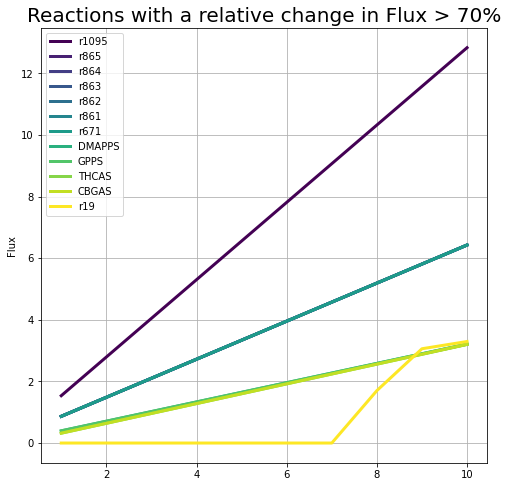

In [31]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 70%', size=20)